In [1]:
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
import seaborn as sns

#import the data set for part B of assignment
variables = pd.read_csv('Group_50.csv')
#separate the X and Y values into different series
Y = variables[['Y']]

X = variables[['X']]

In [2]:
#Specifications for the number of bins - using 20 
bins = np.linspace(variables.X.min(), variables.X.max(), 20)
#bin the data
groups = variables.groupby(pd.cut(variables.X, bins))
# Get the mean of the binned values of X
print (groups.mean().X)

X
(-49.839, -44.588]   -47.353961
(-44.588, -39.337]   -41.988577
(-39.337, -34.085]   -36.699804
(-34.085, -28.834]   -31.629839
(-28.834, -23.583]   -26.404467
(-23.583, -18.332]   -20.988410
(-18.332, -13.08]    -15.707724
(-13.08, -7.829]     -10.637490
(-7.829, -2.578]      -4.931716
(-2.578, 2.673]        0.283839
(2.673, 7.925]         4.974193
(7.925, 13.176]       10.510809
(13.176, 18.427]      16.103847
(18.427, 23.678]      21.249070
(23.678, 28.93]       26.570280
(28.93, 34.181]       31.610406
(34.181, 39.432]      36.829466
(39.432, 44.683]      42.004499
(44.683, 49.935]      47.164749
Name: X, dtype: float64


In [3]:
#identify number of data values in each bin
groups.size()

X
(-49.839, -44.588]    111
(-44.588, -39.337]     91
(-39.337, -34.085]     89
(-34.085, -28.834]     98
(-28.834, -23.583]    139
(-23.583, -18.332]     97
(-18.332, -13.08]     103
(-13.08, -7.829]      113
(-7.829, -2.578]       91
(-2.578, 2.673]        88
(2.673, 7.925]        119
(7.925, 13.176]       106
(13.176, 18.427]      120
(18.427, 23.678]       95
(23.678, 28.93]       121
(28.93, 34.181]       108
(34.181, 39.432]      116
(39.432, 44.683]      100
(44.683, 49.935]       94
dtype: int64

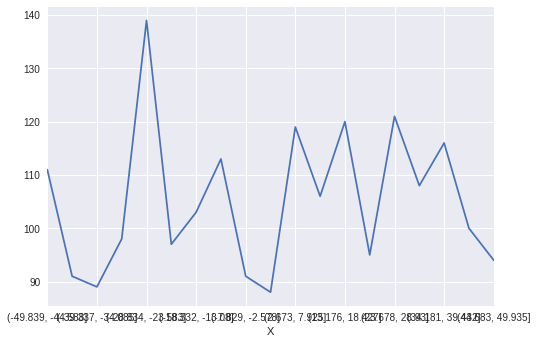

In [4]:
#plot the number of data values in each bin
groups.size().plot()
plt.show()

In [5]:
#create dataframe of entire data set to bin
binning = pd.DataFrame(variables)
#add bin column to dataframe and insert the bin value
binning['bin'] = pd.cut(variables.X, bins)
#display head of dataset
binning.head()

,Y,X,bin
0,177303.310859,-12.376630,"(-13.08, -7.829]"
1,137414.786741,23.217021,"(18.427, 23.678]"
2,143705.473073,-5.346383,"(-7.829, -2.578]"
3,125495.969094,-37.904051,"(-39.337, -34.085]"
4,121452.622211,29.979779,"(28.93, 34.181]"


In [6]:
#gather bins and bin average
tomerge = groups.mean().X
#insert into dataframe
tomerge = pd.DataFrame(tomerge)
#label column as xavg
tomerge.columns = ['xavg']
#label index as bin
tomerge.index.name = 'bin'
#reset the index to move bin column over
tomerge = tomerge.reset_index()
#display the data
tomerge

,bin,xavg
0,"(-49.839, -44.588]",-47.353961
1,"(-44.588, -39.337]",-41.988577
2,"(-39.337, -34.085]",-36.699804
3,"(-34.085, -28.834]",-31.629839
4,"(-28.834, -23.583]",-26.404467
5,"(-23.583, -18.332]",-20.988410
6,"(-18.332, -13.08]",-15.707724
7,"(-13.08, -7.829]",-10.637490
8,"(-7.829, -2.578]",-4.931716
9,"(-2.578, 2.673]",0.283839


In [7]:
#merge binning data set and tomerge to show the original data set, the bin, and the xavg
merged = pd.merge(binning,tomerge, how='left', on='bin')
merged.head()

,Y,X,bin,xavg
0,177303.310859,-12.376630,"(-13.08, -7.829]",-10.637490
1,137414.786741,23.217021,"(18.427, 23.678]",21.249070
2,143705.473073,-5.346383,"(-7.829, -2.578]",-4.931716
3,125495.969094,-37.904051,"(-39.337, -34.085]",-36.699804
4,121452.622211,29.979779,"(28.93, 34.181]",31.610406


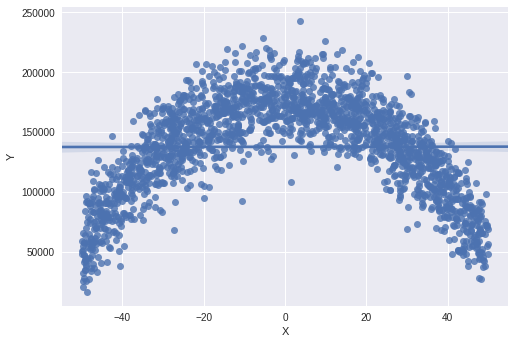

In [8]:
#Plot distribution of original data
sns.regplot(y='Y', x='X', data=variables)
plt.show()

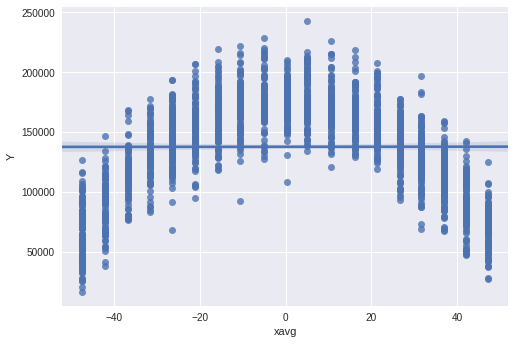

In [9]:
#plot distribution of binned data
sns.regplot(y='Y', x='xavg', data=merged)
plt.show()

In [10]:
#export data set to csv. Using the average of the bin as the X value, and maintaining the Y
export = pd.DataFrame(merged[['Y','xavg']])
export.to_csv('binned_data.csv')
export.head()


,Y,xavg
0,177303.310859,-10.637490
1,137414.786741,21.249070
2,143705.473073,-4.931716
3,125495.969094,-36.699804
4,121452.622211,31.610406
